# PageRank

In [1]:
from pygraphblas import Matrix, Vector, fp64, div, times, lib, Accum
from pygraphblas.descriptor import toor

def pagerank(A, damping_factor, itermax):
    n = A.nrows
    nvals = A.nvals
    d_out = A.reduce_vector()
    nondangling_mask = A.reduce_vector(monoid=lib.GxB_LOR_BOOL_MONOID)
    pr = Vector.from_type(lib.GrB_FP64, n)
    pr[:] = 1.0/n
    teleport = (1 - damping_factor) / n
    for i in range(itermax):
        with div:
            importance_vec = pr * d_out
        with Accum(times):
            importance_vec[:] = damping_factor
        importance_vec = A.mxv(importance_vec, desc=toor)
        dangling_vec = pr[nondangling_mask]
        dangling_sum = dangling_vec.reduce_int()
        dangling_sum *= (damping_factor / n);
        pr[:] = (teleport + dangling_sum)
        pr = pr + importance_vec
    return pr


In [16]:
M = Matrix.from_random(fp64, 7, 7, 30, no_diagonal=True, make_pattern=True)

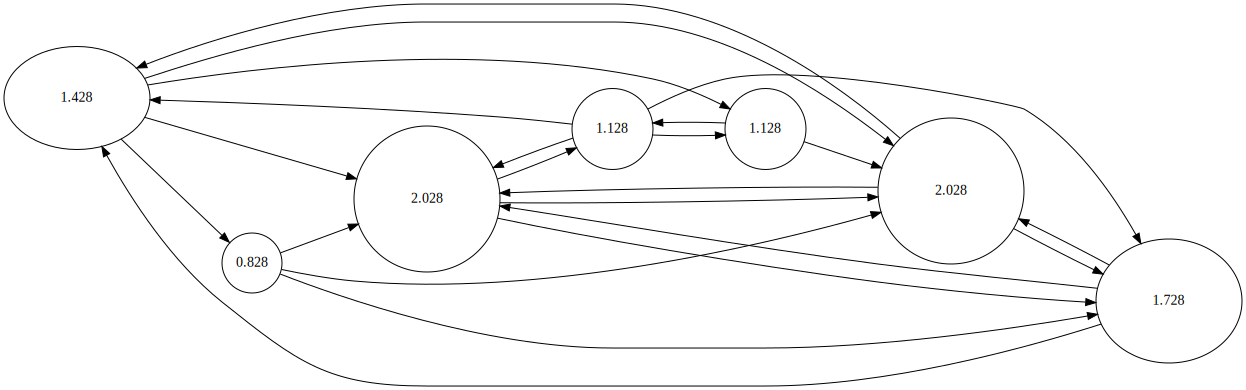

In [18]:
from pygraphblas.demo.gviz import draw
pr = pagerank(M, 0.3, 100)
draw(M, label_vector=pr, size_vector=pr, show_weight=False)